# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}

schargs = {
    'concentration':1.1,
    'stickiness_wi':4000,
    'stickiness_bt':10, # 100
    'sparsity':0.06,
    'pvar': 2,
    'lrate':1,
    'lratep':0.8,
    'decay_rate':1.0,
} 
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_1.310-stickiness_wi_4000.000-stickiness_bt_10.000-sparsity_0.060-pvar_2.000-lrate_1.000-lratep_0.800-decay_rate_1.000-beta2_0.000'

### main

In [5]:
ns = 25
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [6]:
## accuracy
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([0.993  , 0.639  , 0.9155 , 0.6515 , 0.76375])

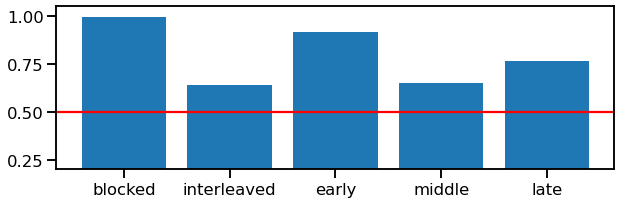

In [7]:
plt.figure(figsize=(10,3))
plt.bar(condL,test_acc)
plt.ylim(0.2,1.05)
plt.axhline(0.5,c='r')

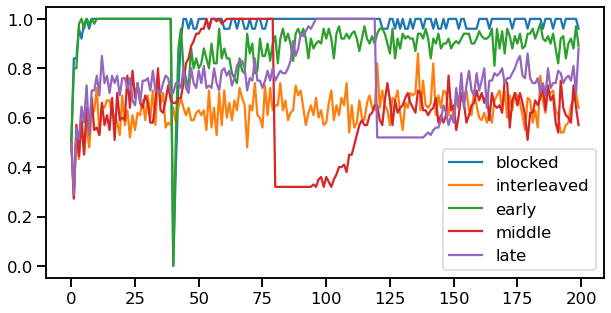

In [8]:
plt.figure(figsize=(10,5))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()

# model state

In [9]:
curr_idx = 0
seed_idx = 0

In [10]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [11]:
tstep = 3
sch = 0
priors[:,tstep,sch]


array([4003.2, 4006.4, 4009.6, 4012.8, 4016. , 4019.2, 4022.4, 4025.6,
       4028.8, 4032. , 4035.2, 4038.4, 4041.6, 4044.8, 4048. , 4051.2,
       4054.4, 4057.6, 4060.8, 4064. , 4067.2, 4070.4, 4073.6, 4076.8,
       4080. , 4083.2, 4086.4, 4089.6, 4092.8, 4096. , 4099.2, 4102.4,
       4105.6, 4108.8, 4112. , 4115.2, 4118.4, 4121.6, 4124.8, 4128. ,
        128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,
        128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,
        128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,
        128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,
        128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,  128.8,
       4131.2, 4134.4, 4137.6, 4140.8, 4144. , 4147.2, 4150.4, 4153.6,
       4156.8, 4160. , 4163.2, 4166.4, 4169.6, 4172.8, 4176. , 4179.2,
       4182.4, 4185.6, 4188.8, 4192. , 4195.2, 4198.4, 4201.6, 4204.8,
       4208. , 4211.2, 4214.4, 4217.6, 4220.8, 4224. , 4227.2, 4230.4,
      